# Window Management

Screen resolution can impact how your web application renders, so `WebDriver` provides mechanisms for moving and resizing the browser window.

**Get window size**: Fetches the size of the browser window in pixels.

```
# Access each dimension individually

width = driver.get_window_size().get("width")
height = driver.get_window_size().get("height")

# Or, store the dimensions and query them later

window_size = driver.get_window_size()
width = window_size.get("width")
height = window_size.get("height")
```

**Set window size**: Restores the window and sets the window size.

```
driver.set_window_size(1024, 768)
```

**Get window position**: Fetches the coordinates of the top left coordinate of the browser window.

```
# Access each dimension individually

x_coordinate = driver.get_window_position().get("x")
y_coordinate = driver.get_window_position().get("y")

# Or, store the dimensions and query them later

window_size = driver.get_window_position()
x_coordinate = window_size.get("x")
y_coordinate = window_size.get("y")
```

**Set window position**: 
Moves the window to the chosen position.

```
# Move the window to the top left of the primary monitor

driver.set_window_position(0,0)
```

**Maximise window**:
* Enlarges the window. 
* For most operating systems, the window will fill the screen, without blocking the operating system’s own menus and toolbars.

```
driver.maximize_window()
```

**Minimize window**:
* Minimizes the window of current browsing context.
* The exact behaviour of this command is specific to individual window managers.
* Minimize Window typically hides the window in the system tray.
* **Note**: This feature works with Selenium 4 and later versions.

```
driver.minimize_window()
```

**Fullscreen window**: Fills the entire screen, similar to pressing `F11` in most browsers.

```
driver.fullscreen_window()
```

**TakeScreenshot**:
* Used to capture screenshots for current browsing context.
* The `WebDriver` endpoint screenshot returns a screenshot which is encoded in Base64 format. 

```
# Return the screenshot of the image as Base64 encoded string
driver.save_screenshot('screenshot.png')

# Gets the screenshot of the current window as a binary data.
image_bytes = driver.get_screenshot_as_png()
print("Binary image data: ", image_bytes)

# Saves a screenshot of the current window to a PNG image file.
# Returns False if there is any IOError, else returns True.
# Use full paths in your filename.
driver.get_screenshot_as_file('screenshot_file.png')

# Gets the screenshot of the current window as a base64 encoded string which is useful in embedded images in HTML
image_base64_str = driver.get_screenshot_as_base64()
print("Base64 encoded string: ", image_base64_str)
```


# Handling windows & tabs

It’s rare for a modern web application not to have any frames or to be constrained to a single window. 

When we have multiple windows in any web application, the activity may need to switch control among several windows from one to another, in order to complete the operation. After completion of the operation, it has to return to the **main window** `i.e.` **parent window**. 

WebDriver supports moving between **named windows** using the **`switch_to.window()`** method:
```
driver.switch_to.window("windowName")
```

All calls to driver will now be interpreted as being directed to the particular window. 
* **But how do you know the window’s name?** 
* Take a look at the javascript or link that opened it.

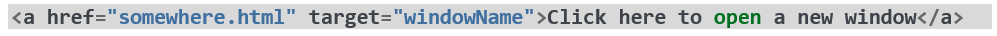

> Alternatively, you can pass a **“window handle”** to the `switch_to.window()` method.

## Window handle

**What is a window handle?** 
* A window handle is a **unique identifier** that holds the address of the window. 
* This is a pointer to a window, which is a string value. 
* **`WebDriver`** provides a property called **`window_handles`** that returns the handles of all windows within the current session.
* It is guaranteed that each window will have a unique window handle.
* Using these window handles, **`WebDriver`** can easily switch control from one window to another.

**Example**:
```
# returns a list of strings: each string is a unique window handle.
handles = driver.window_handles

for handle in handles:
    driver.switch_to.window(handle)
```

## Get window handle(s)

* **`WebDriver`** does not make the distinction between windows and tabs.
* If your site opens a new tab or window, Selenium will let you work with it using a window handle. 
* Each window has a unique identifier that remains persistent in a single session. 

You can get the window handle of the current window as a String by using: 
```
curent_window_handle = driver.current_window_handle
```

You can get all the window handles for the current session as a list of String by using:
```
window_handles = driver.window_handles
```


## Closing a window/tab and switching back to parent window/tab

When you are finished with a window or tab and it is not the last window or tab open in your browser, you should close it and switch back to the window you were using previously. 

Assuming you followed the code sample in the previous section you will have the previous window handle stored in a variable. 

```
main_window = driver.current_window_handle

# switch to tab/window
window_handles = driver.window_handles
driver.switch_to.window(window_handles[1])
driver.close()

driver.switch_to.window(window_handles[0])   OR   driver.switch_to.window(main_window)
```

Forgetting to switch back to another window handle after closing a window will leave **`WebDriver`** executing on the now-closed page, and will trigger a **`NoSuchWindowException`**. 

You must switch back to a valid window handle in order to continue execution.
